# Step1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step2: Create the Dataset

In [3]:
# set the random seed for reproducibility
np.random.seed()

# Create a Synthetic Dataset

data = {
    'product_id': range(1,21),
    'product_name': [f'Product {i}' for i in range(1,21)],
    'category': np.random.choice(['Electronics','Clothing','Home','Sports'],20),
    'units_sold': np.random.poisson(lam=20,size=20), # Poisson Distribution for Sales
    'sale_date': pd.date_range(start='2023-01-01',periods=20,freq='D')

}

In [4]:
sales_data = pd.DataFrame(data)

# Display the first few rows of the dataset

print("Sales Data:")
print(sales_data)

Sales Data:
    product_id product_name     category  units_sold  sale_date
0            1    Product 1       Sports          21 2023-01-01
1            2    Product 2       Sports          16 2023-01-02
2            3    Product 3         Home          24 2023-01-03
3            4    Product 4     Clothing          13 2023-01-04
4            5    Product 5  Electronics          19 2023-01-05
5            6    Product 6       Sports          17 2023-01-06
6            7    Product 7  Electronics          26 2023-01-07
7            8    Product 8       Sports          18 2023-01-08
8            9    Product 9         Home          18 2023-01-09
9           10   Product 10  Electronics          21 2023-01-10
10          11   Product 11         Home          21 2023-01-11
11          12   Product 12  Electronics          13 2023-01-12
12          13   Product 13         Home          16 2023-01-13
13          14   Product 14     Clothing          20 2023-01-14
14          15   Product 15 

In [5]:
# Save the DataFrame as a CSV File
sales_data.to_csv('sales_data.csv',index=False)

In [6]:
# Path Location
import os
os.getcwd()

'/Users/munna/VScode/NareshIT/Adv-Stats-Project'

# Step3: Descriptive Statistics

In [8]:
# Descriptive Statistics
descriptive_stats = sales_data["units_sold"].describe()

# Display descriptive 
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)


Descriptive Statistics for Units Sold:
count    20.0000
mean     19.2000
std       3.5333
min      13.0000
25%      16.7500
50%      19.5000
75%      21.0000
max      26.0000
Name: units_sold, dtype: float64


In [10]:
# Additional Statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

In [11]:
# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()
category_stats.columns = ['Category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of Units Sold']


In [12]:
# Display the results
print("\nStatistical Analysis:")
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance of Units Sold: {variance_sales}")
print(f"Standard Deviation of Units Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)


Statistical Analysis:
Mean Units Sold: 19.2
Median Units Sold: 19.5
Mode Units Sold: 21
Variance of Units Sold: 12.484210526315794
Standard Deviation of Units Sold: 3.5333002315562987

Category Statistics:
      Category  Total Units Sold  Average Units Sold  Std Dev of Units Sold
0     Clothing                75           18.750000               3.947573
1  Electronics                79           19.750000               5.377422
2         Home               124           20.666667               3.204164
3       Sports               106           17.666667               2.160247


# Step4: Inferential Statistics

In [13]:
# Confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-sore for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(np.float64(17.54636458942485), np.float64(20.853635410575148))


# Hypothesis Testing

In [16]:
# Hypothesis Testing (t-test)
# Null hypothesis: Mean units sold is equal to 20
# Alternative hypothesis: Mean units sold is not equal to 20

#t_statistic, p_value = (sales_data.ttest_1samp['units_sold'], 20)
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)


print("\nHypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")


Hypothesis Testing (t-test):
T-statistic: -1.0125685703260514, P-value: 0.32398817993716655
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


# Step5: Visualization

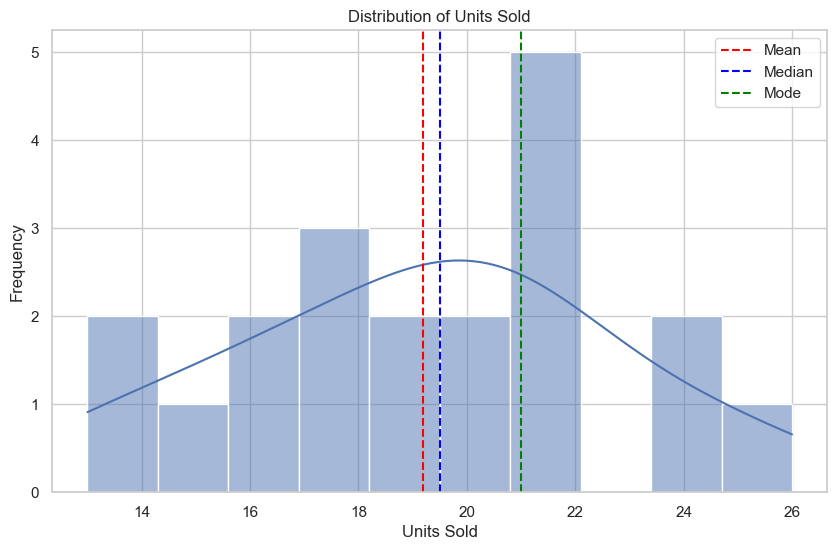

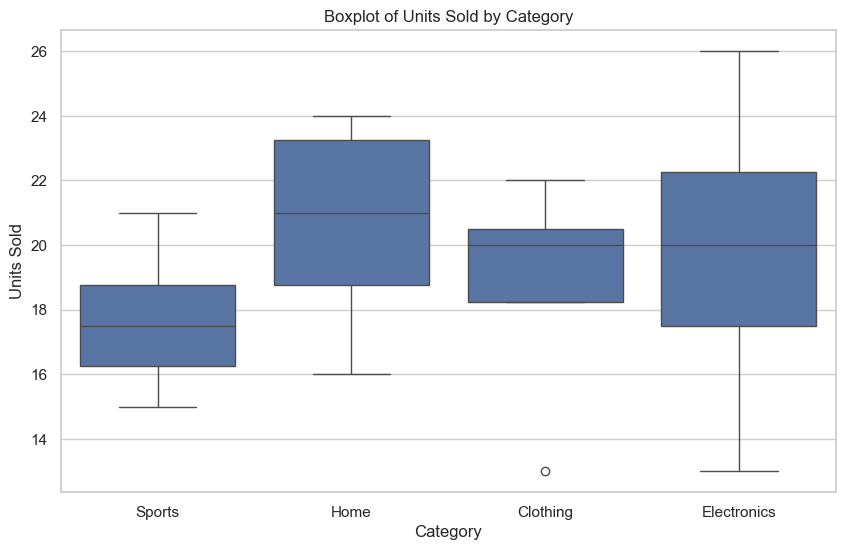

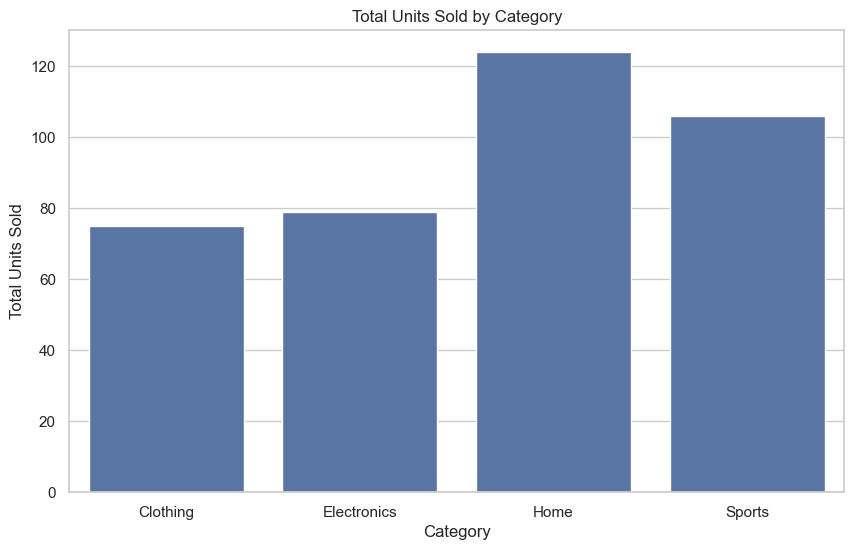

In [17]:
# Visualizations
sns.set(style="whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Units Sold', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()
